In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# **Leitura e Pré-Processamento dos dados**

---



In [ ]:
url = "/content/drive/MyDrive/kaggle/diabetes_prediction_dataset (1).csv/diabetes_prediction_dataset.csv"
df = pd.read_csv(url)

# **Vizualizando os dados**


---



**Classe:** Diabetes

**Atributos:** gender, age, hypertension, heart_disease, smoking_history,
       bmi, HbA1c_level, blood_glucose_level



In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Conversão dos valores string para int


---




Analisando os dados temos duas colunas que apresentam dados não númericos, com isso vamos transformar os dados em númericos

In [ ]:
for i in ['gender', 'smoking_history']:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Verificando se existe **missing values**

---



In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# **Definindo features e a nossa classe**

---



In [ ]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 
        'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df["diabetes"]

# **Dados de treino e de teste**

---



*   Definindo **75%** dos dados para treino e **25%** para teste



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=101)

# **Random Forest**

---



In [ ]:
RF = RandomForestClassifier(max_depth=10).fit(x_train, y_train)

In [ ]:
y_predRF = RF.predict(x_test)

<Axes: >

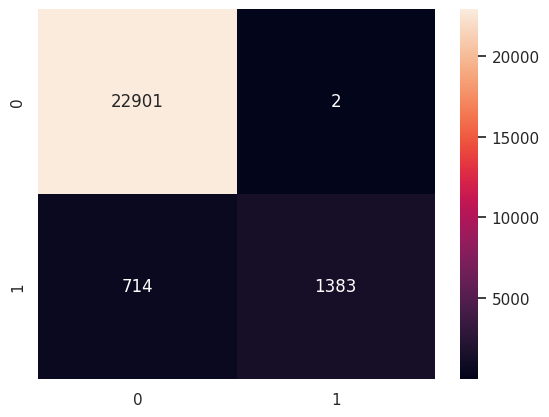

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predRF),annot=True,fmt="d")

In [ ]:
print(f'Acurácia nos testes: {accuracy_score(y_test, y_predRF)}\n')
print(classification_report(y_test, y_predRF)) 

Acurácia nos testes: 0.97136

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22903
           1       1.00      0.66      0.79      2097

    accuracy                           0.97     25000
   macro avg       0.98      0.83      0.89     25000
weighted avg       0.97      0.97      0.97     25000



# **Utilizando métodos de seleção de recursos para buscar melhores resultados**

---



- **Método:** Seleção de Recursos Univariados

1. Usaremos SelectKBest que remove todos, exceto os k recursos de pontuação mais alta.
2. Nesse caso encontraremos as 5 melhores features definindo na célula abaixo o **k = 5**

In [ ]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [ ]:
for index in range(len(select_feature.scores_)):
  print(f'Feature: {x_train.columns[index]} -> Score: {select_feature.scores_[index]}')

Feature: gender -> Score: 57.37151525937382
Feature: age -> Score: 60742.33274664206
Feature: hypertension -> Score: 2687.198747034477
Feature: heart_disease -> Score: 2077.4744461455302
Feature: smoking_history -> Score: 1077.6801050079605
Feature: bmi -> Score: 5469.895099737942
Feature: HbA1c_level -> Score: 2533.0014820540046
Feature: blood_glucose_level -> Score: 160478.42542413197


- Analisando a pontuação para cada feature, temos que as melhores a serem escolhidas são: **age, blood_glucose_level, bmi, hypertension, HbA1c_level**

- Então vamos gerar uma nova classificação com essas features:

Accuracy is: 0.97148


<Axes: >

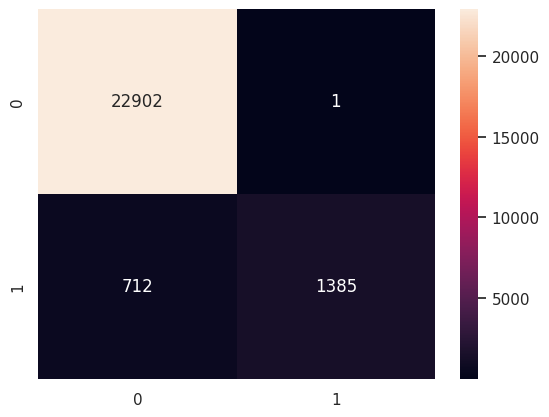

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier(max_depth=10).fit(x_train_2,y_train)
print(f'Accuracy is: {accuracy_score(y_test,clf_rf_2.predict(x_test_2))}')
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")